# Introduction

This notebook is a demo on how to setup a basic Workflow to Work with Jupyter Notebooks

## Install

First install CD4ML package to the development environment

In [1]:
#!pip install git+https://github.com/eduardosan/cd4ml@issue


In [1]:
!python ../setup.py develop
import sys

sys.path.append('../')

/usr/local/lib/python3.9/site-packages/setuptools/dist.py:487: UserWarning: Normalizing '0.0.1
' to '0.0.1'
  warnings.warn(tmpl.format(**locals()))
running develop
running egg_info
writing cd4ml.egg-info/PKG-INFO
writing dependency_links to cd4ml.egg-info/dependency_links.txt
writing requirements to cd4ml.egg-info/requires.txt
writing top-level names to cd4ml.egg-info/top_level.txt
reading manifest file 'cd4ml.egg-info/SOURCES.txt'
writing manifest file 'cd4ml.egg-info/SOURCES.txt'
running build_ext
Creating /usr/local/lib/python3.9/site-packages/cd4ml.egg-link (link to .)
Removing cd4ml 0.0.1 from easy-install.pth file
Adding cd4ml 0.0.1 to easy-install.pth file

Installed /usr/src/app/notebooks
Processing dependencies for cd4ml==0.0.1
Finished processing dependencies for cd4ml==0.0.1


Install here your project dependencies por the experiment

In [2]:
%%writefile requirements.txt

feedparser==6.0.10
pandas==1.4.2
openpyxl==3.0.10
nltk==3.7

Overwriting requirements.txt


In [3]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 53.3 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 KB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 59.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 60.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.0/761.0 KB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 KB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 KB 80.0 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=4cc2de26a74ad68022715b759574a4bb5a366da8cb9e8339b733690717a3764d
  Stored in directory: /root/.cache/pip/wheels/65/7a/a7/78c

## Data extraction

For this example we will download some news feed data to use as a dataset. As this is an introductory example just a few news will be used

### Step 1: download data

The goal is to create the case as a multistep feature extraction. First step is to create a function to download data from a service provider

In [4]:
import feedparser
import pandas as pd

def fetch_feed_data(url):

    blog_feed = feedparser.parse(url)
        
    posts = blog_feed.entries  
    post_list = []
        
    for post in posts:
        post_dict = dict()
            
        post_dict["TITLE"] = post.title
        post_dict["CONTENT"] = post.summary
        post_dict["LINK"] = post.link
        post_dict["TIME_PUBLISHED"] = post.published
        # post_dict["TAGS"] = [tag.term for tag in post.tags]
            
        post_list.append(post_dict)
    df_post = pd.DataFrame(post_list)
    return df_post

Now we are going to use this function to define a task using CD4ML

In [5]:
from cd4ml.task import Task

download = Task(name='download', task=fetch_feed_data)

Every task in CD4ML has a method name `run` to excute it with args. Let's test it with a feed we know.

In [6]:
df_g1 = download.run('https://g1.globo.com/rss/g1/')
df_g1

,TITLE,CONTENT,LINK,TIME_PUBLISHED
0,Homem é preso por ameaçar divulgar fotos íntim...,"<img src=""https://s2.glbimg.com/PnW_vRUmQaqTUX...",https://g1.globo.com/ap/amapa/noticia/2022/06/...,"Thu, 30 Jun 2022 13:17:27 -0000"
1,Polícia Civil cumpre mandados em operação cont...,"<img src=""https://s2.glbimg.com/2RiTZCrRQOIE6m...",https://g1.globo.com/mg/sul-de-minas/noticia/2...,"Thu, 30 Jun 2022 13:16:43 -0000"
2,Empresas de Feira de Santana divulgam vagas de...,"<img src=""https://s2.glbimg.com/rS4n6M7ZkGc-jC...",https://g1.globo.com/ba/bahia/blogdoemprego/no...,"Thu, 30 Jun 2022 13:16:25 -0000"
3,"“Mogi Guaçu em Ação” acontece domingo, dia 03/...","<img src=""https://s2.glbimg.com/uzcJigk-fTiAEi...",https://g1.globo.com/sp/campinas-regiao/especi...,"Thu, 30 Jun 2022 13:16:16 -0000"
4,"Com apresentações de grupos de bumba meu boi, ...","<img src=""https://s2.glbimg.com/b2rNNw3xFhj4HP...",https://g1.globo.com/ma/maranhao/noticia/2022/...,"Thu, 30 Jun 2022 13:15:57 -0000"
5,Quase 2 crianças foram estupradas por dia nos ...,"<img src=""https://s2.glbimg.com/fipl0GWCxr-dXw...",https://g1.globo.com/es/espirito-santo/noticia...,"Thu, 30 Jun 2022 13:15:44 -0000"
6,Maisa se emociona ao falar sobre encontro com ...,"<img src=""https://s2.glbimg.com/TSrbfDaCpUzqiw...",https://g1.globo.com/pop-arte/noticia/2022/06/...,"Thu, 30 Jun 2022 13:14:43 -0000"
7,Trecho da Avenida Rondon Pacheco é parcialment...,"<img src=""https://s2.glbimg.com/S-n7awAXpLdJZl...",https://g1.globo.com/mg/triangulo-mineiro/noti...,"Thu, 30 Jun 2022 13:13:35 -0000"
8,Mulher de 55 anos é o 15° óbito por dengue em ...,"<img src=""https://s2.glbimg.com/OXeXb59o820ucX...",https://g1.globo.com/ms/mato-grosso-do-sul/not...,"Thu, 30 Jun 2022 13:12:48 -0000"
9,Nova unidade do Supermercado Alabarce tem reco...,"<img src=""https://s2.glbimg.com/1gUKlQhHzAhsg3...",https://g1.globo.com/sp/mogi-das-cruzes-suzano...,"Thu, 30 Jun 2022 13:12:28 -0000"


### Step 2: create your first workflow

Now that we downloaded the data we can use to create new features. Let's create a workflow to download feeds from differente providers

In [7]:
from cd4ml.task import Task
from cd4ml.workflow import Workflow

download_g1 = Task(name='download_g1', task=fetch_feed_data)
download_g1_brasil = Task(name='download_g1_brasil', task=fetch_feed_data)
download_folha = Task(name='download_folha', task=fetch_feed_data)

run_config = {
    "download_folha": {
        'params': {'url': "https://feeds.folha.uol.com.br/emcimadahora/rss091.xml"},
        'output': 'download_folha'
    },
    "download_g1": {
        'params': {'url': "https://g1.globo.com/rss/g1/"},
        'output': 'download_g1'
    },
    "download_g1_brasil": {
        'params': {'url': "https://g1.globo.com/rss/g1/brasil"},
        'output': 'download_g1_brasil'
    },
}

w = Workflow()
w.add_task(download_g1)
w.add_task(download_g1_brasil)
w.add_task(download_folha)
output = w.run(run_config=run_config, executor='local')

When defining a workflow two informations are important for each task: `params` and `outputs`. The first will be used as a parameter to the function; the second will the output vaariable returned by the worklow. Let's check the ouput from first step as a start.

In [8]:
output['download_g1']

,TITLE,CONTENT,LINK,TIME_PUBLISHED
0,Maisa se emociona ao falar sobre encontro com ...,"<img src=""https://s2.glbimg.com/TSrbfDaCpUzqiw...",https://g1.globo.com/pop-arte/noticia/2022/06/...,"Thu, 30 Jun 2022 13:14:43 -0000"
1,Trecho da Avenida Rondon Pacheco é parcialment...,"<img src=""https://s2.glbimg.com/S-n7awAXpLdJZl...",https://g1.globo.com/mg/triangulo-mineiro/noti...,"Thu, 30 Jun 2022 13:13:35 -0000"
2,Mulher de 55 anos é o 15° óbito por dengue em ...,"<img src=""https://s2.glbimg.com/OXeXb59o820ucX...",https://g1.globo.com/ms/mato-grosso-do-sul/not...,"Thu, 30 Jun 2022 13:12:48 -0000"
3,Nova unidade do Supermercado Alabarce tem reco...,"<img src=""https://s2.glbimg.com/1gUKlQhHzAhsg3...",https://g1.globo.com/sp/mogi-das-cruzes-suzano...,"Thu, 30 Jun 2022 13:12:28 -0000"
4,"Com shows e barracas típicas, festa julina agi...","<img src=""https://s2.glbimg.com/Nh7PjXQqDmnbpN...",https://g1.globo.com/sp/presidente-prudente-re...,"Thu, 30 Jun 2022 13:12:20 -0000"
5,Empresa de bebidas abre agas de estágio para m...,"<img src=""https://s2.glbimg.com/Wju853RYTtYS4z...",https://g1.globo.com/ce/ceara/suachance/notici...,"Thu, 30 Jun 2022 13:11:28 -0000"
6,MP pede afastamento de prefeito de Taubaté e m...,"<img src=""https://s2.glbimg.com/3iIEOp6MLRwFJN...",https://g1.globo.com/sp/vale-do-paraiba-regiao...,"Thu, 30 Jun 2022 13:09:34 -0000"
7,Cerca de 50% das startups brasileiras não gera...,"<img src=""https://s2.glbimg.com/I6CIAgX7qQlj4v...",https://g1.globo.com/pr/parana/especial-public...,"Thu, 30 Jun 2022 13:08:09 -0000"
8,Veja opções de lazer para crianças e adolescen...,"<img src=""https://s2.glbimg.com/13DGxVKmFQ0i_s...",https://g1.globo.com/go/goias/noticia/2022/06/...,"Thu, 30 Jun 2022 13:08:03 -0000"
9,Confira as atrações do Terra da Gente deste sá...,"<img src=""https://s2.glbimg.com/IE7fZxr8IEt1KG...",https://g1.globo.com/sp/campinas-regiao/terra-...,"Thu, 30 Jun 2022 13:06:10 -0000"


As we can see it will be necessary to aggregate data from different sources, so we proceed to the next step

### Step 3: dependencies

For the next step it will be necessary to work with **dependency** on the steps. Let's create a new step that uses data from other workflow in order to create an unified dataset. First we create a new function to define a new task and add it to the previous workflow.

In [9]:
import pandas as pd

def aggregate(download_g1, download_g1_brasil, download_folha):  
    return pd.concat([download_g1, download_g1_brasil, download_folha], ignore_index=True)

In [10]:
from cd4ml.task import Task

feeds_aggregate = Task(name='feeds_aggregate', task=aggregate)

The specifics about this step is to make sure dependencies are all declared

In [11]:
w = Workflow()

w.add_task(download_g1)
w.add_task(download_g1_brasil)
w.add_task(download_folha)
w.add_task(feeds_aggregate, dependency=['download_g1', 'download_g1_brasil', 'download_folha'])

Let's see the aggregated results after all the steps are executed

In [12]:
run_config = {
    "download_folha": {
        'params': {'url': "https://feeds.folha.uol.com.br/emcimadahora/rss091.xml"},
        'output': 'download_folha'
    },
    "download_g1": {
        'params': {'url': "https://g1.globo.com/rss/g1/"},
        'output': 'download_g1'
    },
    "download_g1_brasil": {
        'params': {'url': "https://g1.globo.com/rss/g1/brasil"},
        'output': 'download_g1_brasil'
    },
    "feeds_aggregate": {
        'params': None,
        'output': 'feeds_aggregate'
    }
}
output = w.run(run_config=run_config, executor='local')

node 'download_g1' was already marked done
node 'download_g1_brasil' was already marked done
node 'download_folha' was already marked done
node 'download_g1' was already marked done
node 'download_g1_brasil' was already marked done
node 'download_folha' was already marked done


In [13]:
output['feeds_aggregate']

,TITLE,CONTENT,LINK,TIME_PUBLISHED
0,Homem é preso por ameaçar divulgar fotos íntim...,"<img src=""https://s2.glbimg.com/PnW_vRUmQaqTUX...",https://g1.globo.com/ap/amapa/noticia/2022/06/...,"Thu, 30 Jun 2022 13:17:27 -0000"
1,Polícia Civil cumpre mandados em operação cont...,"<img src=""https://s2.glbimg.com/2RiTZCrRQOIE6m...",https://g1.globo.com/mg/sul-de-minas/noticia/2...,"Thu, 30 Jun 2022 13:16:43 -0000"
2,Empresas de Feira de Santana divulgam vagas de...,"<img src=""https://s2.glbimg.com/rS4n6M7ZkGc-jC...",https://g1.globo.com/ba/bahia/blogdoemprego/no...,"Thu, 30 Jun 2022 13:16:25 -0000"
3,"“Mogi Guaçu em Ação” acontece domingo, dia 03/...","<img src=""https://s2.glbimg.com/uzcJigk-fTiAEi...",https://g1.globo.com/sp/campinas-regiao/especi...,"Thu, 30 Jun 2022 13:16:16 -0000"
4,"Com apresentações de grupos de bumba meu boi, ...","<img src=""https://s2.glbimg.com/b2rNNw3xFhj4HP...",https://g1.globo.com/ma/maranhao/noticia/2022/...,"Thu, 30 Jun 2022 13:15:57 -0000"
...,...,...,...,...
175,Ministro embarca em nova viagem para apresenta...,"O ministro da Infraestrutura, Marcelo Sampaio,...",https://redir.folha.com.br/redir/online/emcima...,29 Jun 2022 19:41:00 -0300
176,Sony acelera avanço em jogos para computador c...,A Sony anunciou nesta quarta-feira (29) que es...,https://redir.folha.com.br/redir/online/emcima...,29 Jun 2022 19:37:00 -0300
177,Como os patetas de ontem e de hoje nos fazem r...,Toda esta patacoada encenada na Esplanada dos ...,https://redir.folha.com.br/redir/online/emcima...,29 Jun 2022 19:30:00 -0300
178,Preso por injúria racial em jogo do Corinthian...,Dois dos três torcedores do Boca Juniors (ARG)...,https://redir.folha.com.br/redir/online/emcima...,29 Jun 2022 19:23:00 -0300


### Step 4: feature generation

Now that we have been able to add news from other sources, let's run a simple feature generation process. As the goal is to tokenize the results, let's add a new step to the workflow creating a tokenized version of the content. The final goal is to apply an LDA transformation.

In [14]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [15]:
output['feeds_aggregate']['CONTENT'][0]

'<img src="https://s2.glbimg.com/PnW_vRUmQaqTUXJzEzC8NHCZjXw=/i.s3.glbimg.com/v1/AUTH_59edd422c0c84a879bd37670ae4f538a/internal_photos/bs/2019/M/V/zbHoAbRdK4Eayzl0yEGg/extorsao-guaruja-edit.png" /><br />   Vítima era perseguida para que atendesse as ligações e pagasse contas do ex-marido. Preso pagou fiança e responderá em liberdade.  Foto ilustrativa: homem ameaçava divulgar fotos íntimas da ex-companheira\nG1 Santos\nUm homem de 39 anos foi preso em flagrante pela Polícia Civil pelo crime de perseguição contra a ex-esposa, na quarta-feira (29). A vítima denunciou que o ex-marido ameaçava divulgar fotos íntimas dela a detentos do Instituto de Administração Penitenciária do Amapá (Iapen) se ela não fizesse o que o ele pedia. O caso aconteceu no município de Porto Grande, distante 103 quilômetros de Macapá. \nAs exigências do suspeito eram que a vítima atendesse as ligações, fosse ao encontro e pagasse contas dele. O homem, ainda de acordo com a Civil, chegou a realizar mais de 140 liga

In [16]:
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
import string

def preprocess_pandas(feeds_aggregate):
    stop = set(stopwords.words('portuguese') + list(string.punctuation))
    stop.update(['http', 'pro', 'https', 't.', 'co'])

    def preprocess(words):
        # Remove HTML marks
        words = re.sub('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', '', words)
        tokens = word_tokenize(words)
        tokens = [word for word in tokens if word not in stop]
        tokens = [word for word in tokens if re.search(r'\w+', word) and len(word) > 2]
        return tokens
    
    feeds_aggregate['token_set'] = feeds_aggregate.apply(lambda row: preprocess(row.CONTENT.lower()), axis=1)
    return feeds_aggregate

In [17]:
w = Workflow()

pre = Task(name='preprocess', task=preprocess_pandas)

w.add_task(download_g1)
w.add_task(download_g1_brasil)
w.add_task(download_folha)
w.add_task(feeds_aggregate, dependency=['download_g1', 'download_g1_brasil', 'download_folha'])
w.add_task(pre, dependency=['feeds_aggregate'])

In [18]:
run_config = {
    "download_folha": {
        'params': {'url': "https://feeds.folha.uol.com.br/emcimadahora/rss091.xml"},
        'output': 'download_folha'
    },
    "download_g1": {
        'params': {'url': "https://g1.globo.com/rss/g1/"},
        'output': 'download_g1'
    },
    "download_g1_brasil": {
        'params': {'url': "https://g1.globo.com/rss/g1/brasil"},
        'output': 'download_g1_brasil'
    },
    "feeds_aggregate": {
        'params': None,
        'output': 'feeds_aggregate'
    },
    "preprocess": {
        'params': None,
        'output': 'preprocess'
    }
}
output = w.run(run_config=run_config, executor='local')

node 'download_g1' was already marked done
node 'download_g1_brasil' was already marked done
node 'download_folha' was already marked done
node 'download_g1' was already marked done
node 'download_g1_brasil' was already marked done
node 'download_folha' was already marked done
node 'download_g1' was already marked done
node 'download_g1_brasil' was already marked done
node 'download_folha' was already marked done
node 'download_g1' was already marked done
node 'download_g1_brasil' was already marked done
node 'download_folha' was already marked done
node 'feeds_aggregate' was already marked done
node 'download_g1' was already marked done
node 'download_g1_brasil' was already marked done
node 'download_folha' was already marked done
node 'feeds_aggregate' was already marked done


Now we can see a preview with the processed text

In [19]:
output['preprocess']['token_set'][0]

['vítima',
 'perseguida',
 'atendesse',
 'ligações',
 'pagasse',
 'contas',
 'ex-marido',
 'preso',
 'pagou',
 'fiança',
 'responderá',
 'liberdade',
 'foto',
 'ilustrativa',
 'homem',
 'ameaçava',
 'divulgar',
 'fotos',
 'íntimas',
 'ex-companheira',
 'santos',
 'homem',
 'anos',
 'preso',
 'flagrante',
 'polícia',
 'civil',
 'crime',
 'perseguição',
 'contra',
 'ex-esposa',
 'quarta-feira',
 'vítima',
 'denunciou',
 'ex-marido',
 'ameaçava',
 'divulgar',
 'fotos',
 'íntimas',
 'detentos',
 'instituto',
 'administração',
 'penitenciária',
 'amapá',
 'iapen',
 'fizesse',
 'pedia',
 'caso',
 'aconteceu',
 'município',
 'porto',
 'grande',
 'distante',
 '103',
 'quilômetros',
 'macapá',
 'exigências',
 'suspeito',
 'vítima',
 'atendesse',
 'ligações',
 'encontro',
 'pagasse',
 'contas',
 'homem',
 'ainda',
 'acordo',
 'civil',
 'chegou',
 'realizar',
 '140',
 'ligações',
 'ex-esposa',
 'período',
 'horas',
 'nome',
 'divulgado',
 'localizou',
 'defesa',
 'manifestar',
 'sobre',
 'caso',


### Step 5: Draw workflow

Let's see the complete workflow dependencies and tasks. 


**Important**: in order for this part to run it is necessary to run pygraphviz installed. Installation and configuration is out of the scope from this notebbok, [but you can see install instructions here](https://pygraphviz.github.io/documentation/stable/install.html).

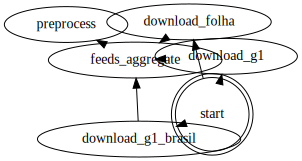

In [21]:
w = Workflow()


w.add_task(download_g1)
w.add_task(download_g1_brasil)
w.add_task(download_folha)
w.add_task(feeds_aggregate, dependency=['download_g1', 'download_g1_brasil', 'download_folha'])
w.add_task(pre, dependency=['feeds_aggregate'])

g = w.draw()
g